<a href="https://colab.research.google.com/github/gaussssss/machinelearning-tpe/blob/main/perceptron_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Des Lignes De Partages Aux Réseaux De Neuronnes

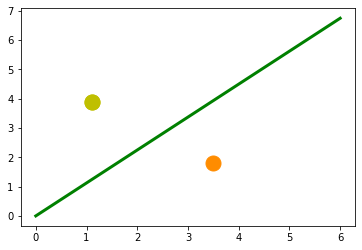

In [ ]:
#programme pour séparer une orange  et un lemon
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig, ax = plt.subplots()
ax.plot(3.5, 1.8, "or",
color="darkorange",
markersize=15)
ax.plot(1.1, 3.9, "oy",
markersize=15)
point_on_line = (4, 4.5)
ax.plot(1.1, 3.9, "oy", markersize=15)

# calcul du gradient:
m = point_on_line[1] / point_on_line[0]
ax.plot(X, m * X, "g-", linewidth=3)
plt.show()

In [ ]:
lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4

# verifie si l'orange est en dessous de la ligne,
# la valeur positive est attendue:
print(orange[0] * m - orange[1])

# verifie si l'orange est au dessus de la ligne,
# valeur négative attendue:
print(lemon[0] * m - lemon[1])

2.1375
-2.6624999999999996


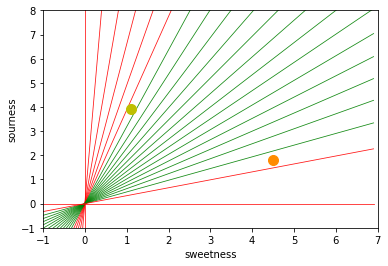

In [ ]:
def create_distance_function(a, b, c):
    """ 0 = ax + by + c """
    def distance(x, y):
        """
        returns tuple (d, pos) d is the distance If pos == -1 point is below the line, 
        0 on the line and +1 if above the line
        """
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom<0 and b<0) or (nom>0 and b>0):
            pos = -1
        else:
            pos = 1
        return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)
    return distance

orange = (4.5, 1.8)
lemon = (1.1, 3.9)
fruits_coords = [orange, lemon]

fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)


step = 0.05
for x in np.arange(0, 1+step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    Y = slope * X
    results = []
    for point in fruits_coords:
        results.append(dist4line1(*point))
    if (results[0][1] != results[1][1]):
        ax.plot(X, Y, "g-", linewidth=0.8, alpha=0.9)
    else:
        ax.plot(X, Y, "r-", linewidth=0.8, alpha=0.9)
    
size = 10
for (index, (x, y)) in enumerate(fruits_coords):
    if index== 0:
        ax.plot(x, y, "o", 
                color="darkorange",
                markersize=size)
    else:
        ax.plot(x, y, "oy",
                markersize=size)

plt.show()

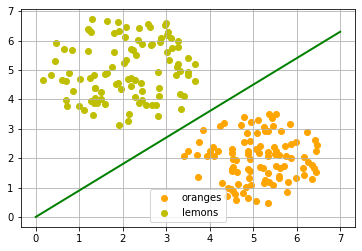

In [ ]:
def points_within_circle(radius,
                         center=(0, 0),
                         number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y

X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)

ax.scatter(oranges_x, 
           oranges_y,
           c="orange",
           label="oranges")
ax.scatter(lemons_x,
           lemons_y,
           c="y",
           label="lemons")
ax.plot(X, 0.9 * X, "g-", linewidth=2)

ax.legend()
ax.grid()
plt.show()

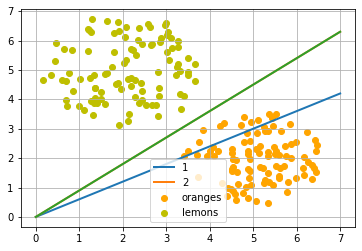

0.8999999999999999


In [ ]:
from itertools import repeat
from random import shuffle

X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,
           oranges_y,
           c="orange",
           label="oranges")
ax.scatter(lemons_x,
           lemons_y,
           c="y",
           label="lemons")

fruits = list(zip(oranges_x,
                  oranges_y,
                  repeat(0, len(oranges_x))))

fruits += list(zip(lemons_x,
                   lemons_y,
                   repeat(1, len(oranges_x))))
shuffle(fruits)

def adjust(learning_rate=0.3, slope=0.3):
    line = None
    counter = 0
    for x, y, label in fruits:
        res = slope * x - y
        #print(label, res)
        if label == 0 and res < 0:
            # point is above line but should be below
            # => increment slope
            slope += learning_rate
            counter += 1
            ax.plot(X, slope * X,
                    linewidth=2, label=str(counter))
        
        elif label == 1 and res > 0:
            # point is below line but should be above
            # => decrement slope
            #print(res, label)
            slope -= learning_rate
            counter += 1
            ax.plot(X, slope * X,
                    linewidth=2, label=str(counter))
    return slope

slope = adjust()
ax.plot(X,
        slope * X,
        linewidth=2)
ax.legend()
ax.grid()
plt.show()

print(slope)

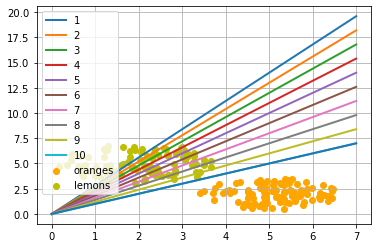

0.9999999999999996


In [ ]:
X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,
           oranges_y,
           c="orange",
           label="oranges")

ax.scatter(lemons_x,
           lemons_y,
           c="y",
           label="lemons")

slope = adjust(learning_rate=0.2, slope=3)

ax.plot(X,
        slope * X,
        linewidth=2)

ax.legend()
ax.grid()
plt.show()

print(slope)

# Un Réseau De Neuronne Simple

In [ ]:
#Le Perceptron

class Perceptron:
    def __init__(self, weights):
        """
        'les poids' Peuvent des tableaux numpy, listes ou tuples avec les valeurs réelles des poids. Le nombre de valeurs 
        d'entrée est indirectement défini par la longeur des poids
        """
        self.weights = np.array(weights)
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return weighted_sum

p = Perceptron(weights=[-0.45, 0.5])

for point in zip(oranges_x[:10], oranges_y[:10]):
    res = p(point)
    print(res, end=", ")

for point in zip(lemons_x[:10], lemons_y[:10]):
    res = p(point)
    print(res, end=", ")

-2.0464792110978682, -0.8369065320242948, -1.4071121831996667, -0.7536784045417664, -1.7404040913852254, -0.3530039492013437, -1.8492392530770778, -2.0025503219290304, -0.9035291498464566, -1.290136519820955, 1.9604256062427552, 2.3051999656276907, 0.9157000761178391, 2.0016895798721954, 1.8809576255343647, 1.840738134244369, 1.392718470019362, 2.618638737731255, 1.759909993134191, 1.0462610818094107, 

In [ ]:
from collections import Counter

evaluation = Counter()
for point in zip(oranges_x, oranges_y):
    res = p(point)
    if res < 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1

for point in zip(lemons_x, lemons_y):
    res = p(point)
    if res >= 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1

print(evaluation)

Counter({'corrects': 200})


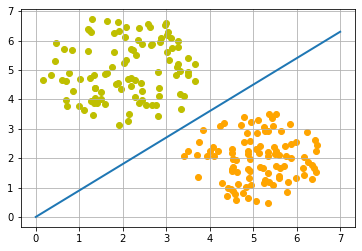

0.9


In [ ]:
import time
slope = 0.1

X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,
           oranges_y,
           c="orange",
           label="oranges")

ax.scatter(lemons_x,
           lemons_y,
           c="y",
           label="lemons")

slope = 0.45 / 0.5
ax.plot(X, slope * X, linewidth=2)

ax.grid()
plt.show()

print(slope)

# Entraîner Un Réseau De Neuronnes

In [ ]:
from sklearn.model_selection import train_test_split
import random

oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))

# étiquetage des oranges avec 0 et lemons avec 1:
labelled_data = list(zip(oranges + lemons,
                         [0] * len(oranges) + [1] * len(lemons)))

random.shuffle(labelled_data)

data, labels = zip(*labelled_data)

res = train_test_split(data, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res
print(train_data[:10], train_labels[:10])

[(3.2777104960767467, 5.992473016845695), (2.5425127499480134, 3.7962084782207515), (4.927688161543516, 1.5772653335303024), (4.889544056296342, 0.6328032353555773), (4.520883406438957, 1.61861958774892), (5.347974040766734, 2.074495572081856), (1.2579440704599578, 4.710627501717479), (4.014554498155434, 2.2504886724470268), (4.754743886391758, 0.7984613149821318), (1.9614501810663294, 4.342682177857501)] [1, 1, 0, 0, 0, 0, 1, 0, 0, 1]


In [ ]:
from collections import Counter

class Perceptron:
    
    def __init__(self,
                 weights,
                 learning_rate=0.1):

        """
        'les poids' Peuvent des tableaux numpy, listes ou tuples avec
        les valeurs réelles des poids. Le nombre de valeurs d'entrée 
        est indirectement défini par la longeur des poids'
        """
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        #print(in_data, weighted_input, weighted_sum)
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self,
               target_result,
               calculated_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data) #
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction
            #print(target_result, calculated_result, error, in_data, correction, self.weights)
    
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index],
             p(train_data[index]),
             train_data[index])
    
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())

print(p.weights)

[('correct', 160)]
[('correct', 40)]
[-1.00092323  1.04000865]


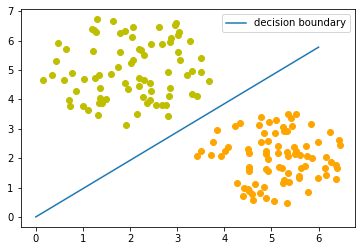

[-1.00092323  1.04000865]


In [ ]:
X = np.arange(0, 7)
fig, ax = plt.subplots()

lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)

ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")

w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

2 -3.6934131668633774 [-1.37830645 -0.3731796 ] (4.927688161543516, 1.5772653335303024)
6 0.9624181749700426 [-1.00092323  1.04000865] (1.2579440704599578, 4.710627501717479)


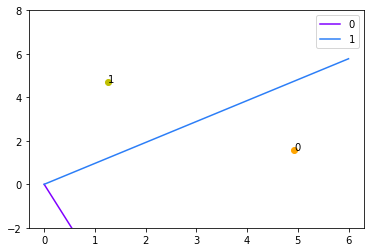

In [ ]:
import matplotlib.cm as cm

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)
number_of_colors = 7
colors = cm.rainbow(np.linspace(0, 1, number_of_colors))

fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2, 8])

counter = 0
for index in range(len(train_data)):
    old_weights = p.weights.copy()
    p.adjust(train_labels[index],
             p(train_data[index]),
             train_data[index])
    if not np.array_equal(old_weights, p.weights):
        color = "orange" if train_labels[index] == 0 else "y"
        ax.scatter(train_data[index][0],
                   train_data[index][1],
                   color=color)
        ax.annotate(str(counter),
                    (train_data[index][0], train_data[index][1]))
        m = -p.weights[0] / p.weights[1]
        print(index, m, p.weights, train_data[index])
        ax.plot(X, m * X, label=str(counter), color=colors[counter])

        counter += 1

ax.legend()
plt.show()

# Simple Réseau De Neuronnes

[]

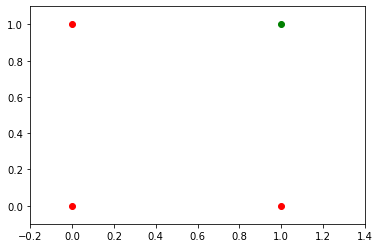

In [ ]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
#ax.plot(X, m * X + 1.2, label="decision boundary")
plt.plot()

[]

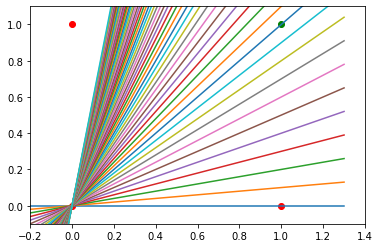

In [ ]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
for m in np.arange(0, 6, 0.1):
    ax.plot(X, m * X )
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
plt.plot()

[]

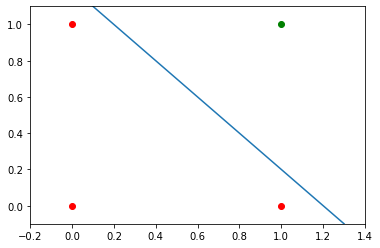

In [ ]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m, c = -1, 1.2
ax.plot(X, m * X + c )
plt.plot()

In [ ]:
# à ecrire dans un fichier Perceptrons.py

class Perceptron:
    
    def __init__(self,
                 weights,
                 bias=1,
                 learning_rate=0.3):
        """
        'les poids' Peuvent des tableaux numpy, listes ou tuples avec
        les valeurs réelles des poids. Le nombre de valeurs d'entrée 
        est indirectement défini par la longeur des poids'
        """

        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x):
        if x <= 0:
            return 0
        else:
            return 1

    def __call__(self, in_data):
        in_data = np.concatenate( (in_data, [self.bias]) )
        result = self.weights @ in_data
        return Perceptron.unit_step_function(result)

    def adjust(self,
               target_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data) #
        calculated_result = self(in_data)
        error = target_result - calculated_result

        if error != 0:
            in_data = np.concatenate( (in_data, [self.bias]) )
            correction = error * in_data * self.learning_rate
            self.weights += correction

    def evaluate(self, data, labels):
        evaluation = Counter()
        for sample, label in zip(data, labels):
            result = self(sample) # predire
            if result == label:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation

In [ ]:
def labelled_samples(n):
    for _ in range(n):
        s = np.random.randint(0, 2, (2,))
        yield (s, 1) if s[0] == 1 and s[1] == 1 else (s, 0)
        
p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.2)

for in_data, label in labelled_samples(30):
    p.adjust(label,
             in_data)
            
test_data, test_labels = list(zip(*labelled_samples(30)))
        
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

Counter({'correct': 30})


-1.0 1.0000000000000007


[]

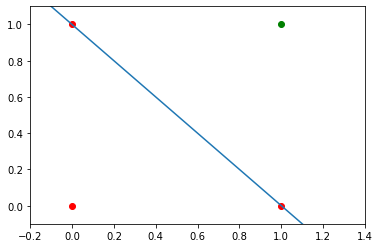

In [ ]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()

In [ ]:
from sklearn.datasets import make_blobs

n_samples = 250

samples, labels = make_blobs(n_samples=n_samples,
                             centers=([2.5, 3], [6.7, 7.9]),
                             random_state=0)

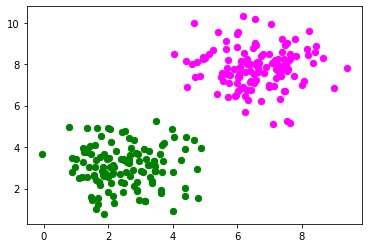

In [ ]:
colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1],
               c=colours[n_class], s=40, label=str(n_class))

In [ ]:
n_learn_data = int(n_samples * 0.8) # 80 % of available data points

learn_data, test_data = samples[:n_learn_data], samples[-n_learn_data:]
learn_labels, test_labels = labels[:n_learn_data], labels[-n_learn_data:]


p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.8)

for sample, label in zip(learn_data, learn_labels):
    p.adjust(label, sample)
    
evaluation = p.evaluate(learn_data, learn_labels)
print(evaluation)

Counter({'correct': 200})


-1.5513529034664024 11.736643489707035


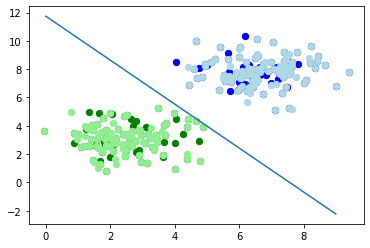

In [ ]:
fig, ax = plt.subplots()

# Tracer des données d'apprentissage
colours = ('green', 'blue')
for n_class in range(2):
    ax.scatter(learn_data[learn_labels==n_class][:, 0],
               learn_data[learn_labels==n_class][:, 1],
               c=colours[n_class], s=40, label=str(n_class))

# Tracer des données de test
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(test_data[test_labels==n_class][:, 0],
               test_data[test_labels==n_class][:, 1],
               c=colours[n_class], s=40, label=str(n_class))

X = np.arange(np.max(samples[:,0]))
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()
plt.show()

## Exercice 1 : 

In [ ]:
p = Perceptron(weights=[0.3, 0.3, 0.3],
               bias=1,
               learning_rate=0.2)

def labelled_samples(n):
    for _ in range(n):
        s = np.random.random((2,))
        yield (s, 1) if s[0] >= 0.5 and s[1] >= 0.5 else (s, 0)

for in_data, label in labelled_samples(30):
    p.adjust(label,
             in_data)
    
test_data, test_labels = list(zip(*labelled_samples(60)))

evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

Counter({'correct': 44, 'wrong': 16})


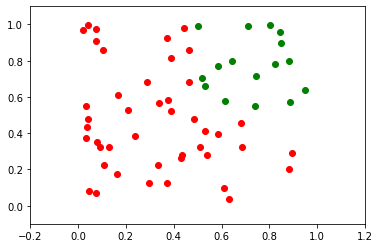

In [ ]:
ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[2] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")

In [ ]:
def labelled_samples(n):
    for _ in range(n):
        s = np.random.random((2,))
        yield (s, 0) if s[0] < 0.5 else (s, 1)

p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.4)

for in_data, label in labelled_samples(300):
    p.adjust(label,
             in_data)

test_data, test_labels = list(zip(*labelled_samples(500)))

print(p.weights)
p.evaluate(test_data, test_labels)

[ 2.28212114  0.07831271 -1.3       ]


Counter({'correct': 477, 'wrong': 23})

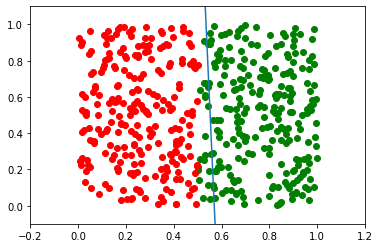

In [ ]:
ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[2] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")

# Réseaux De Neurone, Structure, Poids et Matrices

In [ ]:
input_vector = np.array([2, 4, 11])
print(input_vector)

[ 2  4 11]


In [ ]:
input_vector = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print("The input vector:\n", input_vector)

print("The shape of this vector: ", input_vector.shape)

The input vector:
 [[ 2]
 [ 4]
 [11]]
The shape of this vector:  (3, 1)


# Poids Et Matrices

## Initialiser Les Matrices De poids

In [ ]:
number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)

# all values of s are within the half open interval [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))

True


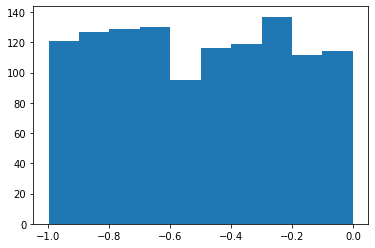

In [ ]:
plt.hist(s)
plt.show()

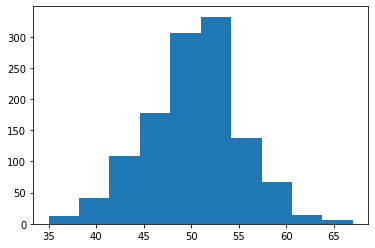

In [ ]:
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()

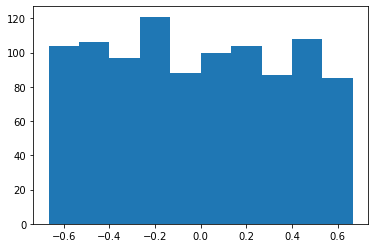

In [ ]:
from scipy.stats import truncnorm
s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)
plt.hist(s)
plt.show()

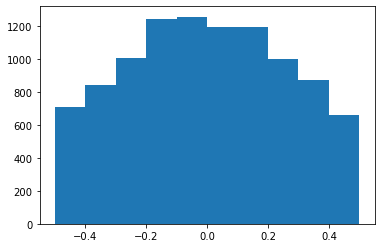

In [ ]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)

plt.hist(s)
plt.show()

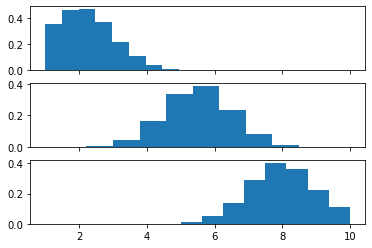

In [ ]:
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), density=True)
ax[1].hist(X2.rvs(10000), density=True)
ax[2].hist(X3.rvs(10000), density=True)
plt.show()

In [ ]:
no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)

X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes))
wih

array([[-0.08137308, -0.4890831 ,  0.21917936],
       [-0.23635523,  0.17564468,  0.01992904],
       [ 0.46892694, -0.12835118,  0.20340588],
       [-0.20363104,  0.34151778,  0.37024661]])

In [ ]:
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes) # ceci est l'entrée de cette couche!

X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

array([[-0.19957524,  0.3984846 ,  0.43592044,  0.49726295],
       [ 0.00768727,  0.4409477 ,  0.28122414, -0.14490614]])

# Running a Neural Network with python

In [ ]:
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:

    def __init__(self,
                 no_of_in_nodes,
                 no_of_out_nodes,
                 no_of_hidden_nodes, learning_rate):

        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()

    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
                                        self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
        self.no_of_hidden_nodes))

    def train(self):
        pass

    def run(self):
        pass

In [ ]:
simple_network = NeuralNetwork(no_of_in_nodes = 3,
                               no_of_out_nodes = 2,
                               no_of_hidden_nodes = 4,
                               learning_rate = 0.1)

print(simple_network.weights_in_hidden)
print(simple_network.weights_hidden_out)

[[ 0.38544911 -0.32559448  0.49150081]
 [-0.48543038  0.32359517  0.47743394]
 [-0.48502482  0.15991218 -0.20697816]
 [-0.40579671  0.4072123  -0.3854013 ]]
[[ 0.35606367  0.32874555  0.00387266 -0.26018595]
 [-0.13906345 -0.33777008 -0.09742251 -0.39491889]]


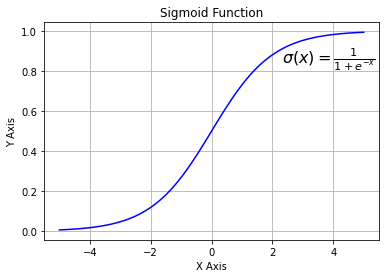

In [ ]:
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)


plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')

plt.grid()

plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)

plt.show()

In [ ]:
from scipy.special import expit
print(expit(3.4))
print(expit([3, 4, 1]))
print(expit(np.array([0.8, 2.3, 8])))

0.9677045353015494
[0.95257413 0.98201379 0.73105858]
[0.68997448 0.90887704 0.99966465]


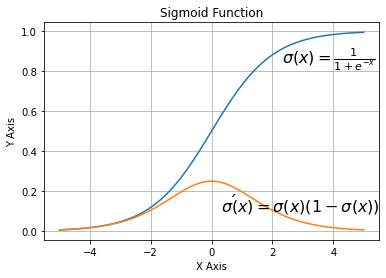

In [ ]:
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)

plt.plot(X, sigma(X))
plt.plot(X, sigma(X) * (1 - sigma(X)))

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')

plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.text(0.3, 0.1, r'$\sigma\'(x) = \sigma(x)(1 - \sigma(x))$', fontsize=16)

plt.show()

In [ ]:
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

#sigmoid = np.vectorize(sigmoid)
sigmoid([3, 4, 5])

array([0.95257413, 0.98201379, 0.99330715])

In [ ]:
# alternative activation function
def ReLU(x):
    return np.maximum(0.0, x)

# derivation of relu
def ReLU_derivation(x):
    if x <= 0:
        return 0
    else:
        return 1

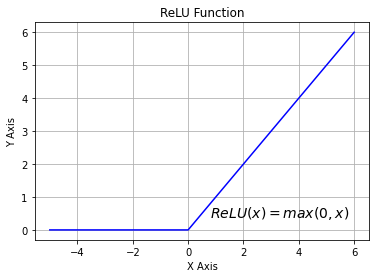

In [ ]:
X = np.linspace(-5, 6, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(0.8, 0.4, r'$ReLU(x)=max(0, x)$', fontsize=14)
plt.show()

### Ajout d'une methode d'execution

In [ ]:
from scipy.special import expit as activation_function

In [ ]:
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
    def __init__(self,
                 no_of_in_nodes,
                 no_of_out_nodes,
                 no_of_hidden_nodes,
                 learning_rate):

        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()

    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
                                        self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
                                         self.no_of_hidden_nodes))
    def train(self, input_vector, target_vector):
        pass

    def run(self, input_vector):
        """
        running the network with an input vector 'input_vector'.
        'input_vector' can be tuple, list or ndarray
        """
        # turning the input vector into a column vector
        input_vector = np.array(input_vector, ndmin=2).T
        input_hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector = activation_function(self.weights_hidden_out @ input_hidden)
        return output_vector

In [ ]:
simple_network = NeuralNetwork(no_of_in_nodes=2,
                               no_of_out_nodes=2,
                               no_of_hidden_nodes=4,
                               learning_rate=0.6)

In [ ]:
simple_network.run([(3, 4)])

array([[0.63478071],
       [0.53077254]])